### 什么是梯度下降

* 不是一个机器学习算法
* 是一种基于搜索的最优化方法
* 作用：最小化一个损失函数
* 梯度上升法：最大化一个效用函数

导数(梯度)代表方向，对应J增大的方向：
  $w=w-\eta \dfrac {dJ}{dw }$
  ($-\eta$ 叫学习率，J为损失函数)
  

#### 模拟梯度下降，假设损失函数为： $J=\left(w-2.5\right) ^{2}-1$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_x = np.linspace(-1,6,1400)
plot_y= (plot_x-2.5)**2-1

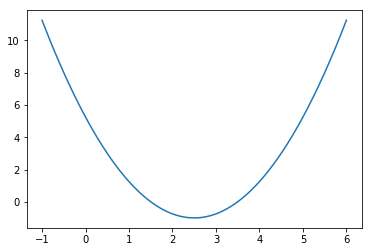

In [3]:
plt.plot(plot_x,plot_y)
plt.show()

In [4]:
def dJ(w):
    return 2*(w-2.5)

In [5]:
def J(w):
    try:
        return (w-2.5)**2-1
    except:
        return float('inf')

In [6]:
def gradient_descent(init_w,eta,epsilon=1e-8,n_iters=1e4):
    w=init_w
    history_w=[w]
    
    i_iter=0
    while i_iter<n_iters:
        grad=dJ(w)
        last_w=w
        w=w-(eta*grad)
        history_w.append(w)
        if(abs(J(w)-J(last_w)) < epsilon):
            break
        i_iter += 1    
    print("w:",w)
    print("J(w):",J(w))
    print("steps:",len(history_w))
    
    # 画图描绘梯度下降过程
    history_x=np.array(history_w)
    history_y=J(history_x)
    # 去除NaN并截断
    if i_iter>=n_iters:
        history_x=history_x[~np.isnan(history_y)]
        history_y=history_y[~np.isnan(history_y)]
        history_x=history_x[:10]
        history_y=history_y[:10]
    plt.plot(plot_x,plot_y)
    plt.plot(history_x,history_y,color='red',marker='x')
    plt.show()

w: 2.499891109642585
J(w): -0.99999998814289
steps: 46


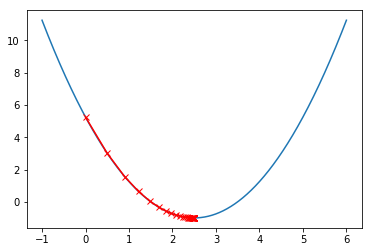

In [7]:
gradient_descent(0.0,0.1)

w: 2.4995140741236224
J(w): -0.9999997638760426
steps: 424


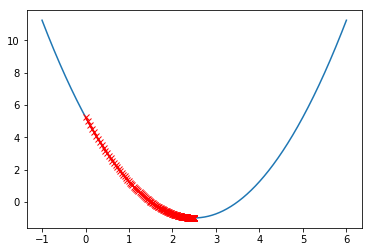

In [8]:
gradient_descent(.0,.01)

w: 2.500054842376601
J(w): -0.9999999969923137
steps: 22


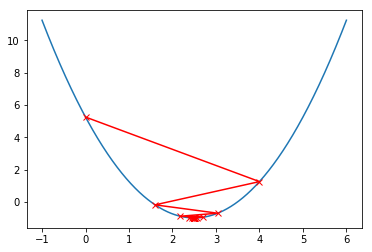

In [9]:
gradient_descent(.0,.8)

w: nan
J(w): nan
steps: 10001


/Users/zc/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in square
  This is separate from the ipykernel package so we can avoid doing imports until


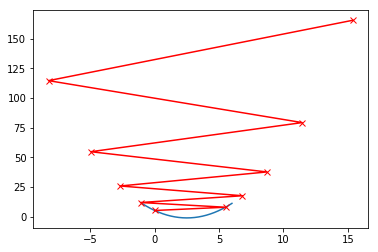

In [10]:
gradient_descent(.0,1.1)

$\eta$ 太大会造成w一直递增，$\eta$ 一般取0.01